##### Our target variable is 'imdb_score' and it is continous type
##### So we'll use Regression type algorithms

##### Libraries

In [1]:
# import  libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

##### Load Data

In [2]:
df = pd.read_csv('movie_metadata.csv')    # read dataset csv file

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()    # print top 5 rows

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.shape    # rows and columns in the dataset

(5043, 28)

In [6]:
df.columns # columns present in dataset

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

#### Missing Values

In [7]:
df.isna().sum().sort_values(ascending=False)    # nan (null) values

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
color                         19
duration                      15
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
language                      12
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [8]:
# Gross and budget have more null values, replacing them is not good thing
# So, we'll remove null value rows from them
df.dropna(subset=['gross', 'budget'], inplace=True)    #drop null value rows in gross , budget

In [9]:
df.isna().sum().sort_values(ascending=False)

aspect_ratio                 75
content_rating               51
plot_keywords                31
actor_3_name                 10
actor_3_facebook_likes       10
facenumber_in_poster          6
actor_2_facebook_likes        5
actor_2_name                  5
actor_1_facebook_likes        3
language                      3
actor_1_name                  3
color                         2
duration                      1
num_critic_for_reviews        1
num_voted_users               0
cast_total_facebook_likes     0
director_name                 0
movie_title                   0
genres                        0
movie_imdb_link               0
num_user_for_reviews          0
gross                         0
country                       0
director_facebook_likes       0
budget                        0
title_year                    0
imdb_score                    0
movie_facebook_likes          0
dtype: int64

In [10]:
# drop all null values from rows wise
df.dropna(inplace=True)

In [11]:
df.shape # remaining rows and columns after dropping nul values from gross and budget

(3756, 28)

In [12]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

##### Remove Duplicates

In [13]:
df.duplicated().sum()    # total sum of duplicate rows

33

In [14]:
df.drop_duplicates(keep='first', inplace=True)    # drop duplicate values and keep first values

In [15]:
df.shape    # rows and columns after dropping duplicates

(3723, 28)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3723 non-null   object 
 1   director_name              3723 non-null   object 
 2   num_critic_for_reviews     3723 non-null   float64
 3   duration                   3723 non-null   float64
 4   director_facebook_likes    3723 non-null   float64
 5   actor_3_facebook_likes     3723 non-null   float64
 6   actor_2_name               3723 non-null   object 
 7   actor_1_facebook_likes     3723 non-null   float64
 8   gross                      3723 non-null   float64
 9   genres                     3723 non-null   object 
 10  actor_1_name               3723 non-null   object 
 11  movie_title                3723 non-null   object 
 12  num_voted_users            3723 non-null   int64  
 13  cast_total_facebook_likes  3723 non-null   int64

In [17]:
# statistical info of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3723.0,1.670406e+02,1.233451e+02,2.00,77.00,138.00,224.00,8.130000e+02
duration,3723.0,1.102635e+02,2.267832e+01,37.00,96.00,106.00,120.00,3.300000e+02
director_facebook_likes,3723.0,8.098644e+02,3.076624e+03,0.00,11.00,63.00,235.00,2.300000e+04
actor_3_facebook_likes,3723.0,7.650102e+02,1.868842e+03,0.00,194.00,436.00,690.00,2.300000e+04
actor_1_facebook_likes,3723.0,7.743336e+03,1.555795e+04,0.00,744.50,1000.00,13000.00,6.400000e+05
gross,3723.0,5.248034e+07,6.980333e+07,162.00,8124330.00,30050028.00,66901813.50,7.605058e+08
num_voted_users,3723.0,1.055543e+05,1.515651e+05,91.00,19598.50,53977.00,128524.00,1.689764e+06
cast_total_facebook_likes,3723.0,1.149497e+04,1.911327e+04,0.00,1907.00,4050.00,16232.50,6.567300e+05
facenumber_in_poster,3723.0,1.376041e+00,2.045134e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,3723.0,3.358977e+02,4.110786e+02,4.00,109.00,209.00,398.00,5.060000e+03


### Drop columns

In [18]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [19]:
# drop unnecessary columns
# Same with plot keywords and movie link is also a redundant variable.
df.drop(['movie_imdb_link', 'plot_keywords'], axis=1, inplace=True)

In [20]:
# color
df.color.value_counts()

Color               3600
 Black and White     123
Name: color, dtype: int64

In [21]:
# since more movies are in color, So we'll drop this column
df.drop('color',  axis=1, inplace=True)

In [22]:
# language
df.language.value_counts()

English       3566
French          34
Spanish         23
Mandarin        14
German          10
Japanese        10
Cantonese        7
Italian          7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Mongolian        1
None             1
Romanian         1
Vietnamese       1
Arabic           1
Hebrew           1
Zulu             1
Czech            1
Russian          1
Filipino         1
Maya             1
Kazakh           1
Hungarian        1
Aramaic          1
Bosnian          1
Name: language, dtype: int64

In [23]:
# maximum movies are in English, So we'll drop this
df.drop('language', axis=1, inplace=True)

In [24]:
# country
df.country.value_counts()

USA               2961
UK                 313
France             101
Germany             79
Canada              59
Australia           39
Spain               21
Japan               15
Hong Kong           13
China               12
Italy               11
New Zealand         11
South Korea          8
Denmark              8
Ireland              7
Mexico               6
Brazil               5
India                5
Iran                 4
Thailand             4
Norway               4
Russia               3
Argentina            3
Netherlands          3
South Africa         3
Czech Republic       3
Hungary              2
Taiwan               2
Romania              2
Finland              1
Indonesia            1
Israel               1
Poland               1
Colombia             1
New Line             1
Iceland              1
Aruba                1
Peru                 1
Belgium              1
Georgia              1
West Germany         1
Chile                1
Official site        1
Greece     

In [25]:
# filter
grec = df[['movie_title', 'country']]
result = grec[grec['country'] == 'India']
result

,movie_title,country
3075,Kabhi Alvida Naa Kehna,India
3276,Jab Tak Hai Jaan,India
3344,My Name Is Khan,India
4385,The Lunchbox,India
4490,Monsoon Wedding,India


In [26]:
# USA and UK has more movies,  so we'll these term same and rest countries will name as 'Others'

def func(country):
    if(country == 'USA'):
        return 'USA'
    elif(country == 'UK'):
        return 'UK'
    else:
        return 'Others'
    
df['country'] = df.apply(lambda x: func(x['country']), axis=1)
df.country.value_counts()

USA       2961
Others     449
UK         313
Name: country, dtype: int64

In [27]:
# genre
df['genres'].head()    # genre column in dataset

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

In [28]:
# create new dataframe for genre and Imdb score
genre_df = df[['genres', 'imdb_score']]
genre_df

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
5,Action|Adventure|Sci-Fi,6.6
...,...,...
5026,Drama|Music|Romance,6.9
5027,Drama,7.5
5033,Drama|Sci-Fi|Thriller,7.0
5035,Action|Crime|Drama|Romance|Thriller,6.9


In [29]:
# splitting genres and save each value in row with its corresponding imdb score
genre_df = genre_df.assign(genres = genre_df['genres'].str.split('|')).explode('genres')
genre_df

,genres,imdb_score
0,Action,7.9
0,Adventure,7.9
0,Fantasy,7.9
0,Sci-Fi,7.9
1,Action,7.1
...,...,...
5035,Crime,6.9
5035,Drama,6.9
5035,Romance,6.9
5035,Thriller,6.9


In [30]:
genre_df['genres'].value_counts()    # genres repeated counts

Drama          1876
Comedy         1455
Thriller       1105
Action          951
Romance         851
Adventure       773
Crime           704
Fantasy         504
Sci-Fi          492
Family          440
Horror          386
Mystery         378
Biography       238
Animation       196
War             150
Music           149
History         147
Sport           147
Musical          96
Western          57
Documentary      45
Film-Noir         1
Name: genres, dtype: int64

In [31]:
genre_df.genres.unique()    # different types of genres in column

array(['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Romance',
       'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western',
       'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography',
       'Music', 'Documentary', 'Film-Noir'], dtype=object)

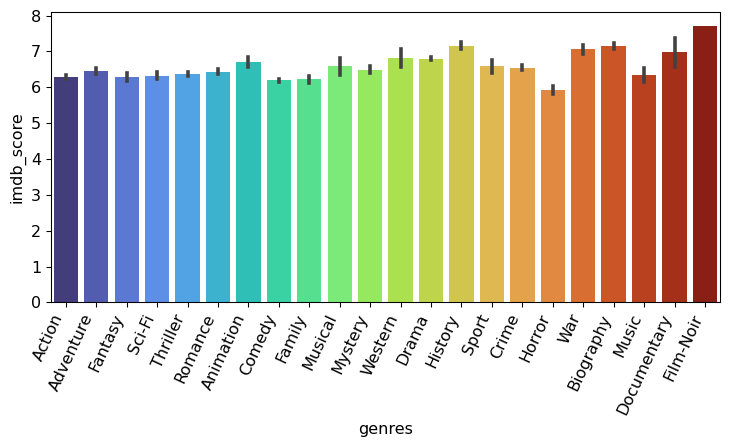

In [32]:
plt.figure(figsize=(9,4))
genre = sns.barplot(x='genres', y='imdb_score', data = genre_df, palette='turbo')    # plot barplot for genre and imdb_score
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

In [33]:
# there is not much difference with genre and score
# all values are between 5.8 to 8.0
# so we'll drop it
df.drop('genres', axis=1, inplace=True)

In [34]:
df.aspect_ratio.value_counts()

2.35     1969
1.85     1577
1.37       48
1.66       39
1.78       34
1.33       18
2.39       11
2.20       10
2.00        3
2.40        3
2.76        3
1.75        2
1.18        1
2.55        1
1.77        1
1.50        1
2.24        1
16.00       1
Name: aspect_ratio, dtype: int64

In [35]:
# most common ratio are 2.35 & 1.85
# calculate mean for these
aspt_1 = df.loc[df['aspect_ratio'] == 2.35, 'imdb_score'].mean()

aspt_2 = df.loc[df['aspect_ratio'] == 1.85, 'imdb_score'].mean()

aspt_3 = df.loc[df['aspect_ratio'] != (2.35 or 1.85), 'imdb_score'].mean()

print('2.35 mean is : {},\n1.85 mean is : {},\nothers mean is : {}'.format(aspt_1, aspt_2, aspt_3))

2.35 mean is : 6.511223971559165,
1.85 mean is : 6.3646163601775685,
others mean is : 6.41453819840367


In [36]:
# as all ratio means fall under 6.3 to 6.6
# we'll drop this as there is not much difference
df.drop('aspect_ratio', axis=1, inplace=True)    # drop aspect_ratio column

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3723.0,1.670406e+02,1.233451e+02,2.0,77.0,138.0,224.0,8.130000e+02
duration,3723.0,1.102635e+02,2.267832e+01,37.0,96.0,106.0,120.0,3.300000e+02
director_facebook_likes,3723.0,8.098644e+02,3.076624e+03,0.0,11.0,63.0,235.0,2.300000e+04
actor_3_facebook_likes,3723.0,7.650102e+02,1.868842e+03,0.0,194.0,436.0,690.0,2.300000e+04
actor_1_facebook_likes,3723.0,7.743336e+03,1.555795e+04,0.0,744.5,1000.0,13000.0,6.400000e+05
gross,3723.0,5.248034e+07,6.980333e+07,162.0,8124330.0,30050028.0,66901813.5,7.605058e+08
num_voted_users,3723.0,1.055543e+05,1.515651e+05,91.0,19598.5,53977.0,128524.0,1.689764e+06
cast_total_facebook_likes,3723.0,1.149497e+04,1.911327e+04,0.0,1907.0,4050.0,16232.5,6.567300e+05
facenumber_in_poster,3723.0,1.376041e+00,2.045134e+00,0.0,0.0,1.0,2.0,4.300000e+01
num_user_for_reviews,3723.0,3.358977e+02,4.110786e+02,4.0,109.0,209.0,398.0,5.060000e+03


In [38]:
# Deal with 0's

df['director_facebook_likes'] = df['director_facebook_likes'].replace([0.0], float('nan'))
df['facenumber_in_poster'] = df['facenumber_in_poster'].replace([0.0], float('nan'))
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].replace([0.0], float('nan'))
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].replace([0.0], float('nan'))
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].replace([0.0], float('nan'))
df['cast_total_facebook_likes'] = df['cast_total_facebook_likes'].replace([0.0], float('nan'))
df['movie_facebook_likes'] = df['movie_facebook_likes'].replace([0.0], float('nan'))

df['director_facebook_likes'] = df['director_facebook_likes'].fillna(round(df.director_facebook_likes.mean()))
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(round(df.num_critic_for_reviews.mean()))
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].fillna(round(df.actor_1_facebook_likes.mean()))
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].fillna(round(df.actor_2_facebook_likes.mean()))
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(round(df.actor_3_facebook_likes.mean()))
df['cast_total_facebook_likes'] = df['cast_total_facebook_likes'].fillna(round(df.cast_total_facebook_likes.mean()))
df['movie_facebook_likes'] = df['movie_facebook_likes'].fillna(round(df.movie_facebook_likes.mean()))

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3723.0,1.670406e+02,1.233451e+02,2.0,77.0,138.0,224.0,8.130000e+02
duration,3723.0,1.102635e+02,2.267832e+01,37.0,96.0,106.0,120.0,3.300000e+02
director_facebook_likes,3723.0,9.760701e+02,3.054663e+03,2.0,40.0,154.0,747.5,2.300000e+04
actor_3_facebook_likes,3723.0,7.706017e+02,1.867697e+03,2.0,201.5,442.0,697.0,2.300000e+04
actor_1_facebook_likes,3723.0,7.745416e+03,1.555744e+04,2.0,745.0,1000.0,13000.0,6.400000e+05
gross,3723.0,5.248034e+07,6.980333e+07,162.0,8124330.0,30050028.0,66901813.5,7.605058e+08
num_voted_users,3723.0,1.055543e+05,1.515651e+05,91.0,19598.5,53977.0,128524.0,1.689764e+06
cast_total_facebook_likes,3723.0,1.149806e+04,1.911235e+04,2.0,1912.5,4053.0,16232.5,6.567300e+05
facenumber_in_poster,3723.0,7.175557e+01,8.131648e+01,1.0,1.0,4.0,167.0,1.670000e+02
num_user_for_reviews,3723.0,3.358977e+02,4.110786e+02,4.0,109.0,209.0,398.0,5.060000e+03


#### Sort out content ratings

In [40]:
# sort out content ratings
df['content_rating'].value_counts()

R            1687
PG-13        1291
PG            563
G              87
Not Rated      34
Unrated        22
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [41]:
# replace M and GP with PG
# replace X with NC-17
# replace Approved, NotRated, Passed and UnRated with most common rating R
df['content_rating'] = df['content_rating'].replace(['M', 'GP'], 'PG')
df['content_rating'] = df['content_rating'].replace(['Approved', 'Not Rated', 'Passed', 'Unrated'], 'R')
df['content_rating'] = df['content_rating'].replace(['X'], 'NC-17')

df['content_rating'].value_counts()

R        1763
PG-13    1291
PG        566
G          87
NC-17      16
Name: content_rating, dtype: int64

#### Add Columns

In [42]:
def func(gross, budget):
    return gross - budget

df['profit'] = df.apply(lambda x: func(x['gross'], x['budget']), axis=1)

In [43]:
df['profit']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
5      -190641321.0
           ...     
5026       131507.0
5027       663780.0
5033       417760.0
5035      2033920.0
5042        84122.0
Name: profit, Length: 3723, dtype: float64

## Data Visualization

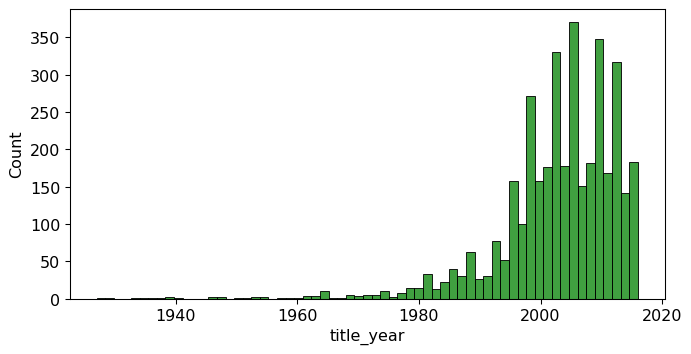

In [44]:
# movie released
plt.figure(figsize=(8,4))
sns.histplot(df.title_year, color='Green')
plt.show()

In [45]:
# as more movies are after year 1980
# we'll consider only movies after 1980
df = df[df.title_year>=1980]

In [46]:
df.title_year.value_counts().sort_index()

1980.0     14
1981.0     17
1982.0     16
1983.0     13
1984.0     22
1985.0     15
1986.0     25
1987.0     30
1988.0     29
1989.0     33
1990.0     26
1991.0     30
1992.0     33
1993.0     44
1994.0     51
1995.0     66
1996.0     92
1997.0    100
1998.0    115
1999.0    157
2000.0    157
2001.0    176
2002.0    186
2003.0    145
2004.0    178
2005.0    182
2006.0    188
2007.0    151
2008.0    182
2009.0    181
2010.0    167
2011.0    168
2012.0    155
2013.0    162
2014.0    142
2015.0    125
2016.0     58
Name: title_year, dtype: int64

#### Top 20 movies based on its Profit

In [47]:
top_movies_profit = df[['movie_title', 'profit', 'budget']].sort_values('profit', ascending=False)[:20]
top_movies_profit

,movie_title,profit,budget
0,Avatar,523505847.0,237000000.0
29,Jurassic World,502177271.0,150000000.0
26,Titanic,458672302.0,200000000.0
3080,E.T. the Extra-Terrestrial,424449459.0,10500000.0
17,The Avengers,403279547.0,220000000.0
509,The Lion King,377783777.0,45000000.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0,115000000.0
66,The Dark Knight,348316061.0,185000000.0
439,The Hunger Games,329999255.0,78000000.0
812,Deadpool,305024263.0,58000000.0


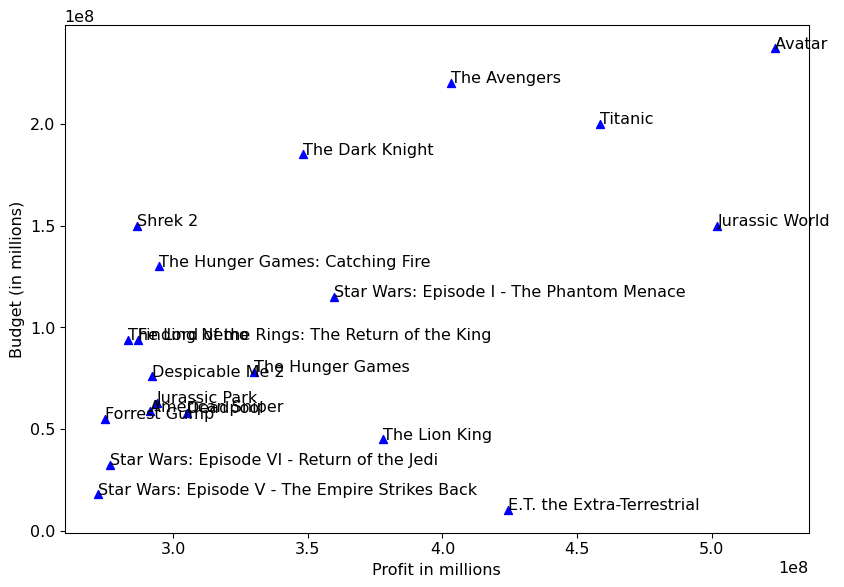

In [48]:
types = list(top_movies_profit['movie_title'])
x_coords = list(top_movies_profit['profit'])
y_coords = list(top_movies_profit['budget'])

plt.figure(figsize=(10,7))
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, color='blue', marker='^')
    plt.text(x, y, type, fontsize=12)
plt.xlabel('Profit in millions')
plt.ylabel('Budget (in millions)')
plt.show()

In [49]:
df.director_name.value_counts().nlargest(20)

Steven Spielberg     23
Clint Eastwood       19
Woody Allen          18
Ridley Scott         16
Tim Burton           16
Steven Soderbergh    16
Renny Harlin         15
Spike Lee            15
Martin Scorsese      15
Robert Zemeckis      13
Michael Bay          13
Oliver Stone         13
Barry Levinson       13
Ron Howard           13
Robert Rodriguez     13
Joel Schumacher      12
Tony Scott           12
Sam Raimi            12
Shawn Levy           11
Rob Reiner           11
Name: director_name, dtype: int64

In [50]:
direc_df = df[['director_name', 'imdb_score']]
result = direc_df[direc_df['imdb_score']>6]
result.sort_values('imdb_score',ascending=False)[:20]

,director_name,imdb_score
1937,Frank Darabont,9.3
66,Christopher Nolan,9.0
3355,Quentin Tarantino,8.9
339,Peter Jackson,8.9
1874,Steven Spielberg,8.9
836,Robert Zemeckis,8.8
683,David Fincher,8.8
97,Christopher Nolan,8.8
270,Peter Jackson,8.8
2051,Irvin Kershner,8.8


## Data Preprocessing

In [51]:
print(df['director_name'].nunique())   # unique values of director
print(df[['actor_1_name', 'actor_2_name', 'actor_3_name']].stack().nunique())    # unique values of actors

1612
4210


In [52]:
df.drop(['movie_title', 'actor_3_name'], axis=1, inplace=True)

#### Remove Linear Dependent Variables

In [53]:
df.drop(['profit'], axis=1, inplace=True)

#### Remove Highly Correlated Variables

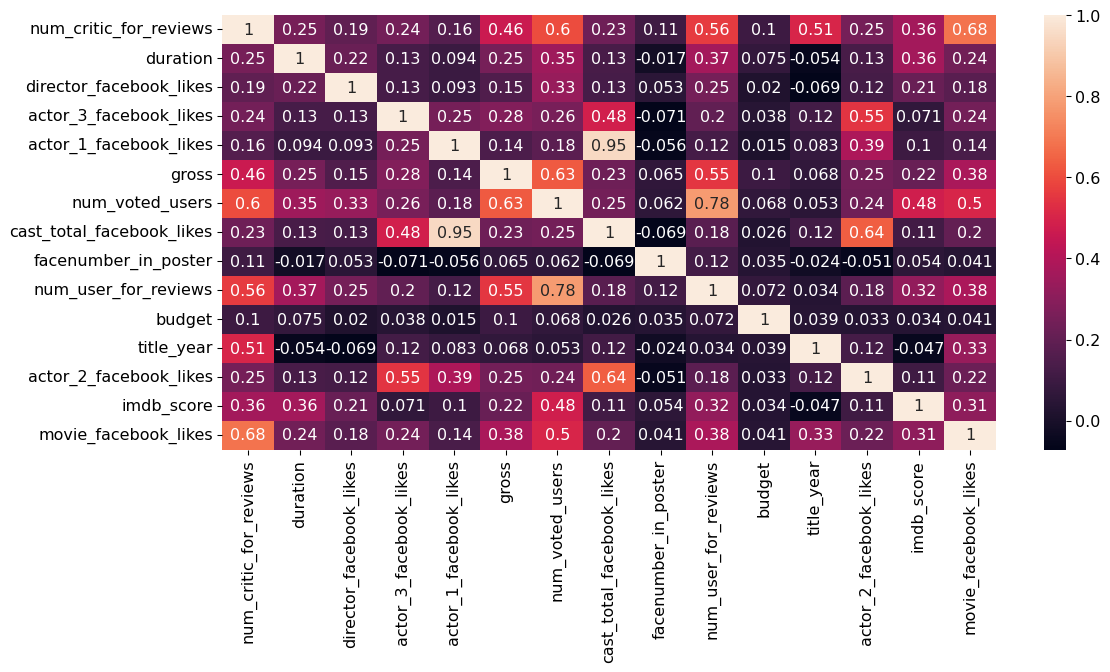

In [54]:
# plot corelation heatmap
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

Based on the heatmap, we can see some high correlations (greater than 0.7) betweenpredictors.According to the highest correlation value 0.95, we find actor_1_facebook_likes is highlycorrelated   with   the   cast_total_facebook_likes,   and   both   actor2   and   actor3   are   alsosomehow   correlated   to   the   total.   So   we   want   to   modify   them   into   two   variables:actor_1_facebook_likes and other_actors_facebook_likes.There   are   high   correlations   among   num_voted_users,   num_user_for_reviews   and num_critic_for_reviews.   We want   to   keep   num_voted_users   and   take   the   ratio   of num_user_for_reviews and num_critic_for_reviews

In [55]:
def func(a1, a2):
    return a1 + a2

df['other_actors_facebook_likes'] = df.apply(lambda x: func(x['actor_2_facebook_likes'], x['actor_3_facebook_likes']), axis=1)

In [56]:
def func(a1,a2):
    return a1/a2

df['critic_review_ratio'] = df.apply(lambda x: func(x['num_critic_for_reviews'], x['num_user_for_reviews']), axis=1)

In [57]:
df.drop(['actor_2_facebook_likes', 'actor_3_facebook_likes' ,'num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

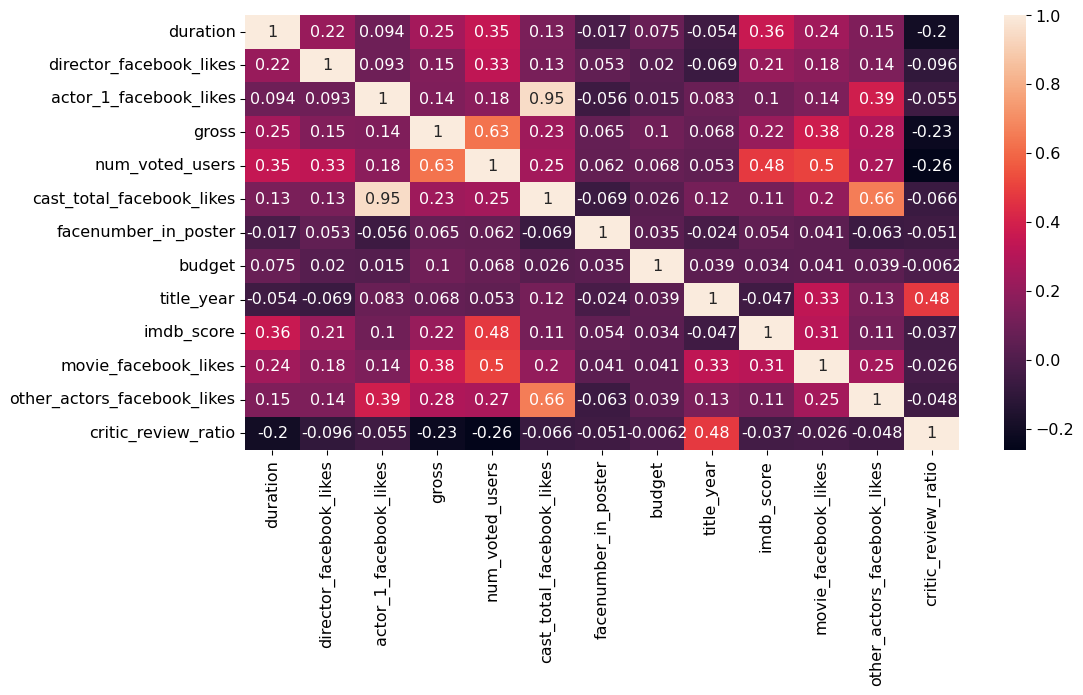

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Label Encoding

In [59]:
cat_vals = ['country', 'content_rating', 'director_name', 'actor_1_name', 'actor_2_name']
df[cat_vals] = df[cat_vals].apply(LabelEncoder().fit_transform)

In [60]:
df.dtypes

director_name                    int32
duration                       float64
director_facebook_likes        float64
actor_2_name                     int32
actor_1_facebook_likes         float64
gross                          float64
actor_1_name                     int32
num_voted_users                  int64
cast_total_facebook_likes      float64
facenumber_in_poster           float64
country                          int32
content_rating                   int32
budget                         float64
title_year                     float64
imdb_score                     float64
movie_facebook_likes           float64
other_actors_facebook_likes    float64
critic_review_ratio            float64
dtype: object

## Distribution plot

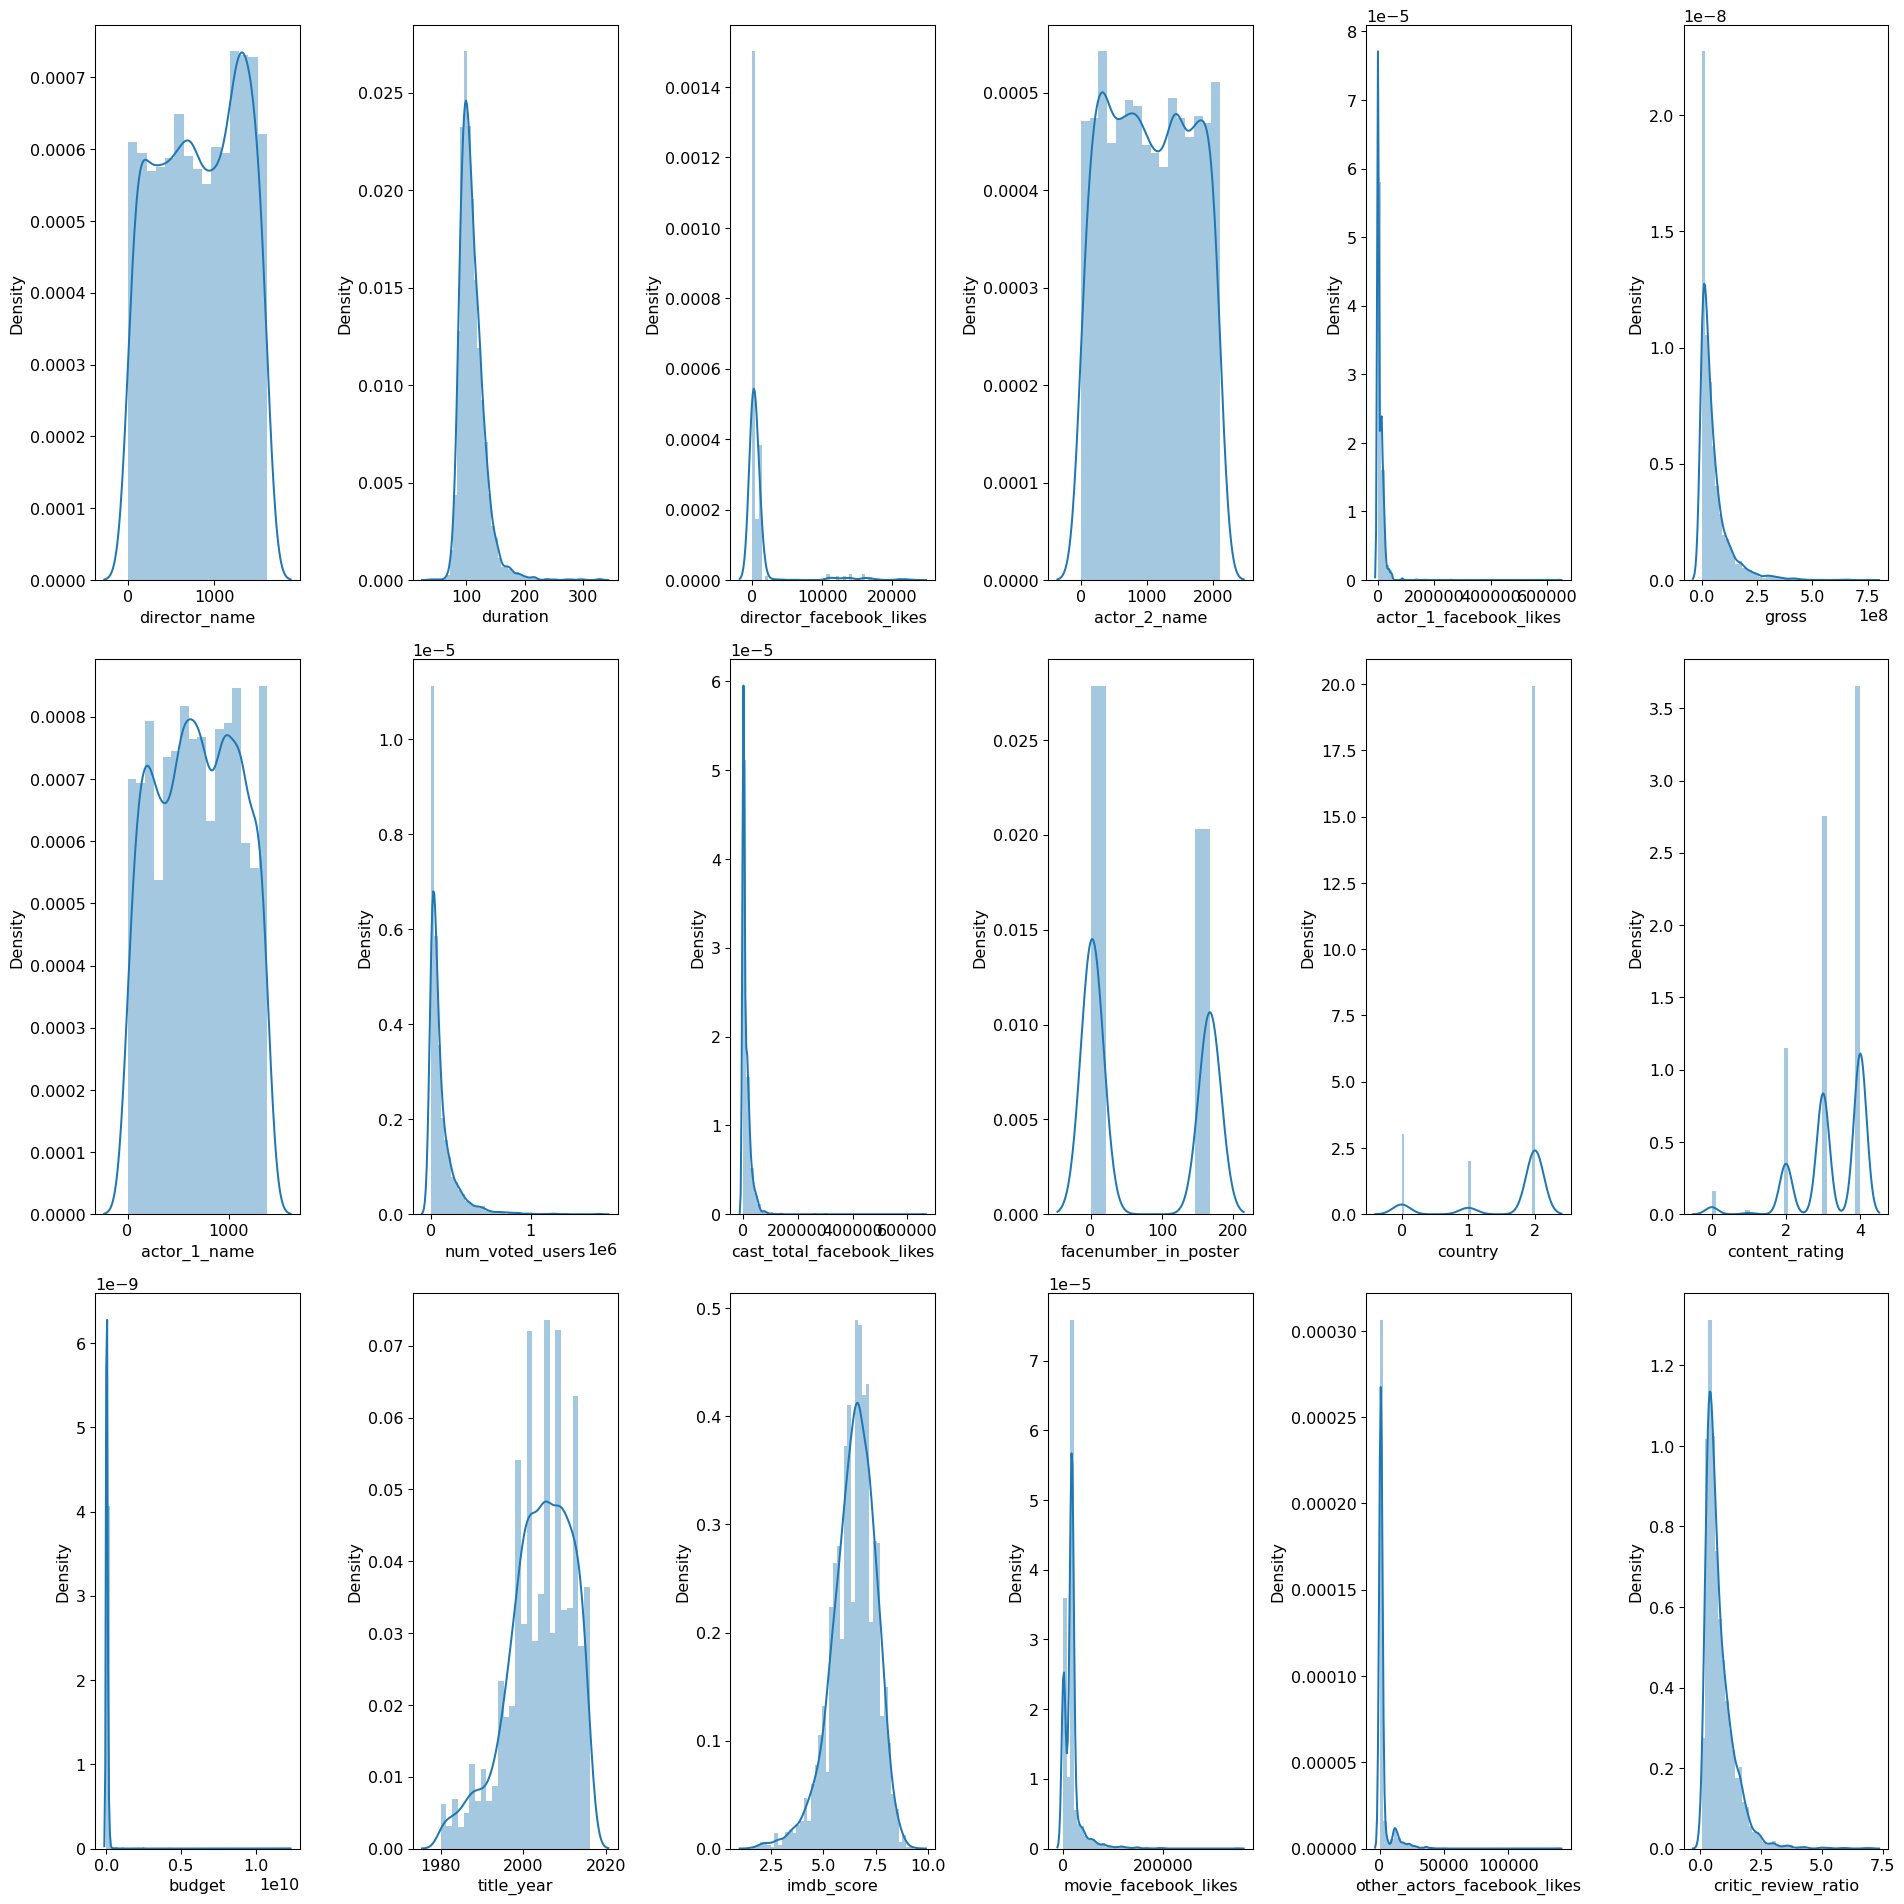

In [61]:
rows=3
cols=6
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()

## Log Transformation

In [62]:
df.columns

Index(['director_name', 'duration', 'director_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'country',
       'content_rating', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'other_actors_facebook_likes',
       'critic_review_ratio'],
      dtype='object')

In [63]:
skewed_features = ['director_name', 'duration', 'director_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'num_voted_users',
       'cast_total_facebook_likes', 'facenumber_in_poster',
        'country', 'content_rating', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'other_actors_facebook_likes',
       'critic_review_ratio']

In [64]:
for i in skewed_features:
    df[i]=np.log(df[i]+1)
# Applying log transformation on the skewed features   

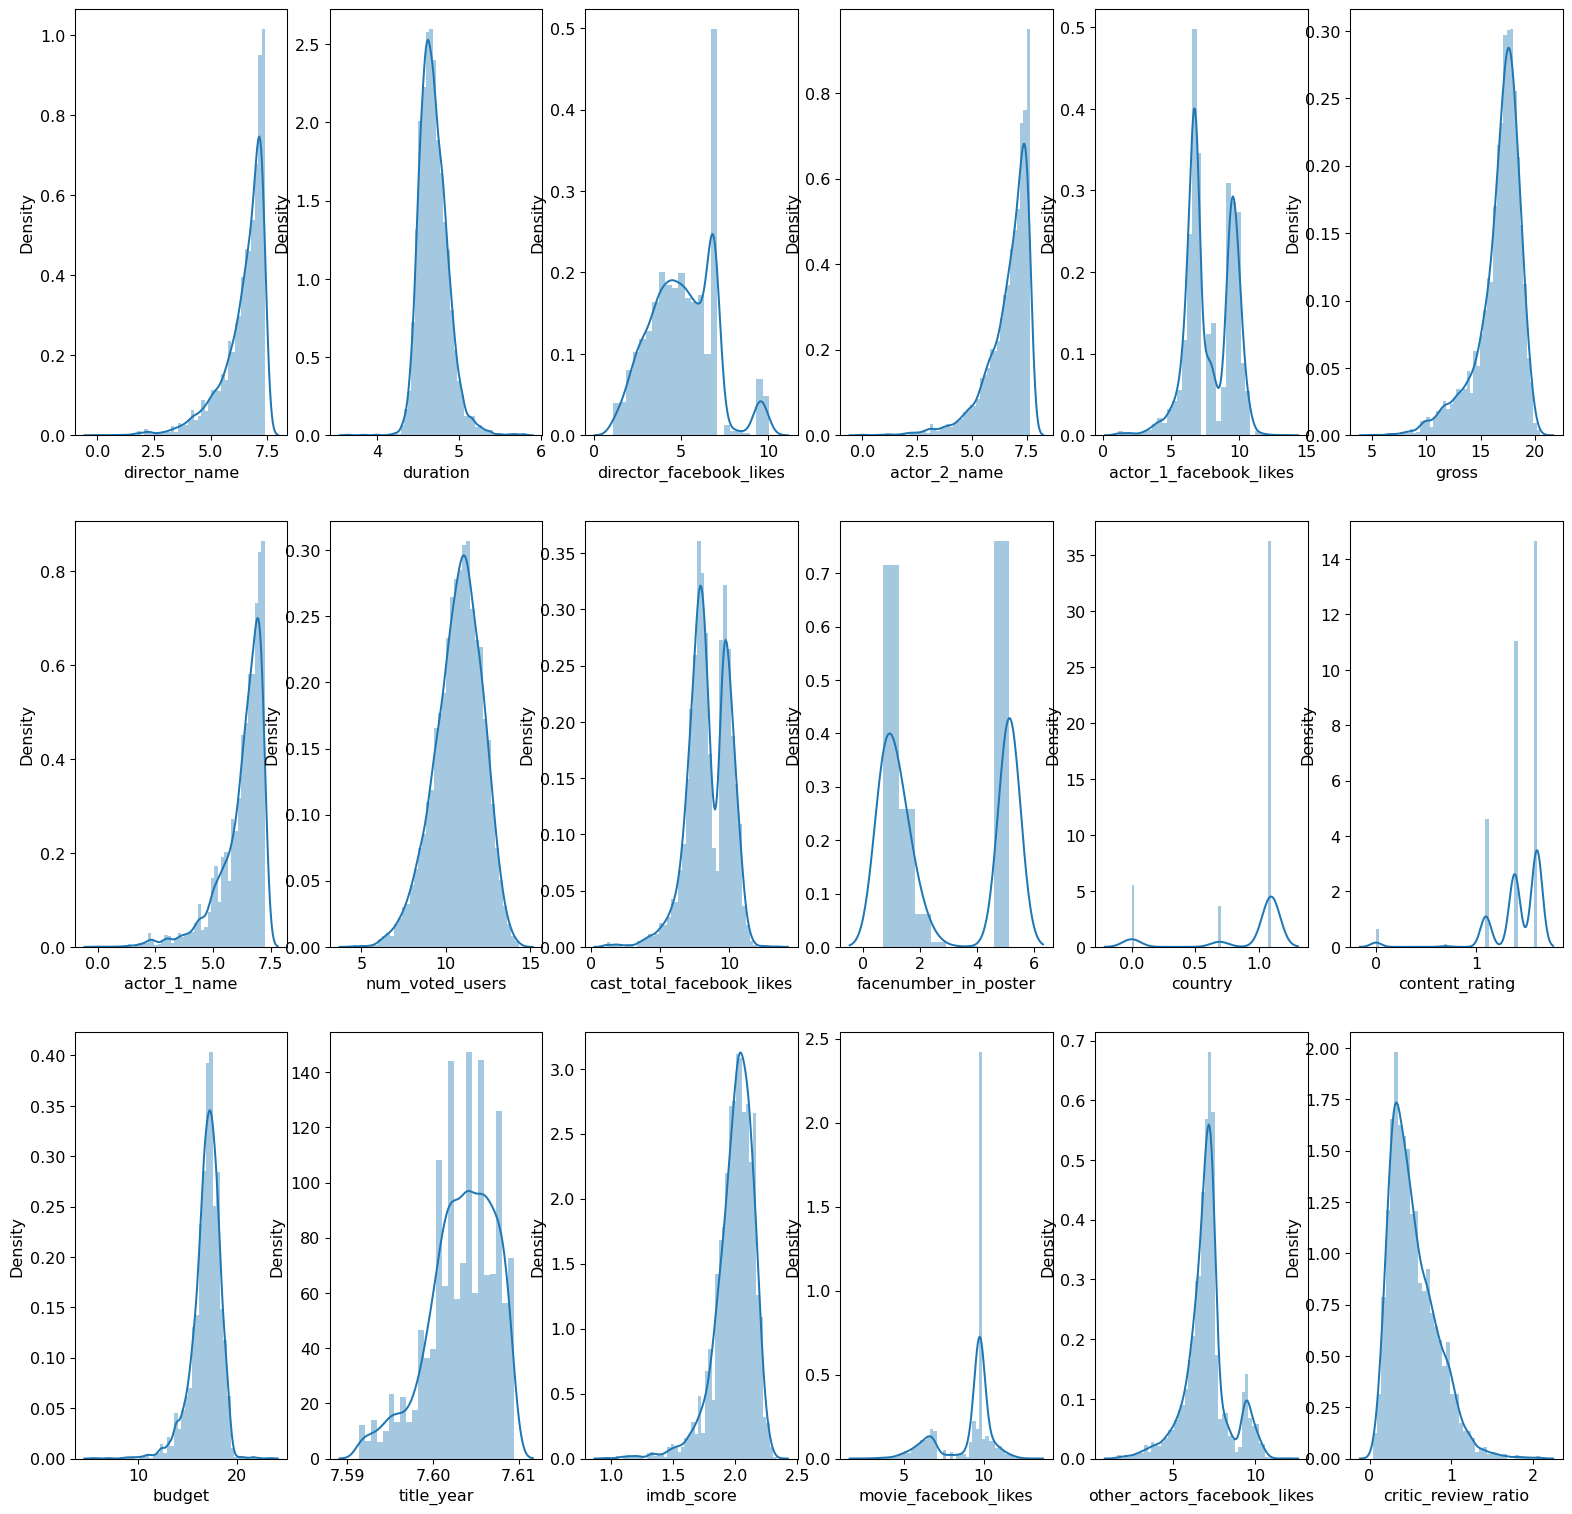

In [65]:
rows=3
cols=6
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.show()
# Checking the changes in the distribution of data after applying log transformation.

### Split Data

In [66]:
X=df.drop(labels=['imdb_score'],axis=1)
y=df['imdb_score']

In [67]:
X.head()

,director_name,duration,director_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,country,content_rating,budget,title_year,movie_facebook_likes,other_actors_facebook_likes,critic_review_ratio
0,6.398595,5.187386,6.884487,6.870053,6.908755,20.449494,5.225747,13.694704,8.483636,5.123964,1.098612,1.386294,19.283571,7.605890,10.404293,7.491088,0.212478
1,6.257668,5.135798,6.335054,7.339538,10.596660,19.550159,6.504288,13.063082,10.786242,5.123964,1.098612,1.386294,19.519293,7.604894,9.762673,8.699681,0.218285
2,7.212294,5.003946,6.884487,7.457032,9.305741,19.114199,5.537334,12.527681,9.367430,0.693147,0.693147,1.386294,19.316769,7.608871,11.350418,6.318968,0.473519
3,5.501258,5.105945,9.998843,5.926926,10.203629,19.920595,7.167809,13.950337,11.578339,5.123964,1.098612,1.386294,19.336971,7.607381,12.007628,10.736418,0.263133
5,4.110874,4.890349,6.165418,7.480992,6.463029,18.106774,5.762051,12.265308,7.535830,0.693147,1.098612,1.386294,19.390323,7.607381,10.085851,7.058758,0.486133


In [68]:
y.head()

0    2.186051
1    2.091864
2    2.054124
3    2.251292
5    2.028148
Name: imdb_score, dtype: float64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Machine Learning

## Linear Regression

In [70]:
Lr = LinearRegression()
Lr = Lr.fit(x_train,y_train)

#Traindata Predictions
train_pred = Lr.predict(x_train)

#testdata predictions
test_pred = Lr.predict(x_test)

RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(y_train,train_pred))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',Lr.score(x_train, y_train))
print('RSquared value on test:',Lr.score(x_test, y_test))

RMSE TrainingData =  0.12165085282099926
RMSE TestData =  0.11422251750357847
--------------------------------------------------
RSquared value on train: 0.40922878235079885
RSquared value on test: 0.3992875611590059


## Decision Tree Regressor

In [71]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(x_train,y_train)

#predicting train
train_preds=DT.predict(x_train)
#predicting on test
test_preds=DT.predict(x_test)

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(x_train, y_train))
print('RSquared value on test:',DT.score(x_test, y_test))

RMSE TrainingData =  0.07602449694328067
RMSE TestData =  0.13936121663093157
--------------------------------------------------
RSquared value on train: 0.7692742200266157
RSquared value on test: 0.10577454728078484


## Random Forest Regressor

In [72]:
Rfr=RandomForestRegressor()
Rfr.fit(x_train,y_train)

#predicting train
train_preds=Rfr.predict(x_train)
#predicting on test
test_preds=Rfr.predict(x_test)

RMSE_train=(np.sqrt(mean_squared_error(y_train,train_preds)))
RMSE_test=(np.sqrt(mean_squared_error(y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',Rfr.score(x_train, y_train))
print('RSquared value on test:',Rfr.score(x_test, y_test))

RMSE TrainingData =  0.04208608748485518
RMSE TestData =  0.10355484972370449
--------------------------------------------------
RSquared value on train: 0.9292923961783283
RSquared value on test: 0.5062534721715763
